In [2]:
import numpy as np

## Brændevidde

In [3]:
def brændevidde(data, X=14.5):
    x1, x2, y1, y2, Z = data
    horizontal = (x2 - x1) * (Z / X)
    vertical = (y2 - y1) * (Z / X)
    
    return (horizontal, vertical)

In [31]:
frame_02 = (256, 410, 212, 366, 161)
frame_01 = (509, 708, 125, 323, 124)
frame_05 = (441, 601, 468, 630, 117)
frame_04 = (507, 722, 447, 666, 85.5)
frame_03 = (418, 710, 370, 677, 76)
frame_08 = (377, 730, 231, 589, 70.4)
frame_07 = (336, 763, 188, 591, 62.5)
frame_06 = (226, 775, 66, 626, 44.5)

frames = np.array([
    frame_02,
    frame_01,
    frame_05,
    frame_04,
    frame_03,
    frame_08,
    frame_07,
    frame_06
])
brændevidder = [brændevidde(frame) for frame in frames]

In [33]:
avg = np.mean(brændevidder, axis=0)
var = np.var(brændevidder, axis=0)

print("Brændevidde f (vertical):                   ", round(avg[1], 2))
print("Variance in sample values of f (vertical): ", round(var[1], 2))

Brændevidde f (vertical):                    1600.58
Variance in sample values of f (vertical):  31727.46


## Afstand til landmærket
1. Bestemt ved 2 billeder

In [50]:
def dist_by_two_images(data_a, data_b):
    " Returns a tuple of (real pos, estimated pos, error)"
    x1_a, x2_a, y1_a, y2_a, Z_a = data_a
    x1_b, x2_b, y1_b, y2_b, Z_b = data_b
    
    D = Z_a - Z_b
    p1 = y2_a - y1_a # højde i pixels, image 1
    p2 = y2_b - y1_b # højde i pixels, image 2
    Z_2 = D * (p1 / (p2 - p1))
    error = np.absolute(Z_2 - Z_b)
    
    return (Z_b, Z_2, error)

            
distances_by_two_images = [
    dist_by_two_images(frames[i], frames[j])
    for i in range(len(frames) - 1)
    for j in range(len(frames))
    if i < j
]

mean_real_dist_1 = np.mean(distances_by_two_images, axis=0)[0]
mean_est_dist_1 = np.mean(distances_by_two_images, axis=0)[1]
mean_error_1 = np.mean(distances_by_two_images, axis=0)[2]                                                                                                                                                                           

var_error_1 = np.var(distances_by_two_images, axis=0)[2]

print("Mean real distance:         ", round(mean_real_dist_1, 2))
print("Mean estimated distance:    ", round(mean_est_dist_1, 2))
print("Mean error in cm:           ", round(mean_error_1, 2))
print("Error variance:          ", round(var_error_1, 2))

print(len(distances_by_two_images))


Mean real distance:          69.89
Mean estimated distance:     93.09
Mean error in cm:            57.85
Error variance:           20016.97
28


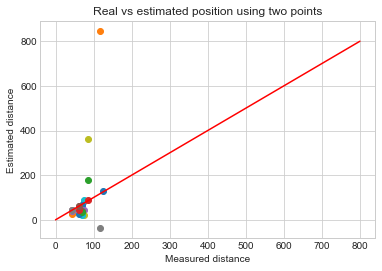

In [59]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 800, 10)
y = np.linspace(0, 800, 10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(x, y, color="red")
plt.title("Real vs estimated position using two points")
plt.xlabel("Measured distance")
plt.ylabel("Estimated distance")
[plt.scatter(dist[0], dist[1]) for dist in distances_by_two_images]
plt.show()


2. Bestemt ved brændevidden

In [20]:
def image_dist(data, X=14.5, f=1600):
    x1, x2, y1, y2, Z = data
    dist = f * (X / (y2 - y1))
    error = np.absolute(dist - Z)
    return (Z, dist, error)

dist_and_error = np.array([image_dist(frame) for frame in frames])
mean_error_2 = np.mean(dist_and_error, axis=0)[2]
var_error_2 = np.var(dist_and_error, axis=0)[2]
#print(dist_and_error)
print("Mean error in cm:  ", round(mean_error_2, 2))
print("Error variance:   ", round(var_error_2, 2))

Mean error in cm:   9.73
Error variance:    70.74


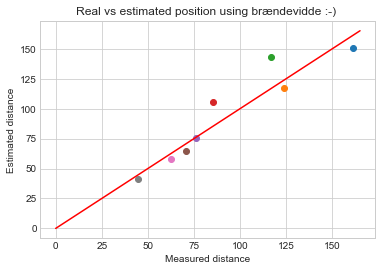

In [17]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 165, 10)
y = np.linspace(0, 165, 10)
plt.plot(x, y, color="red")
plt.title("Real vs estimated position using brændevidde :-) ")
plt.xlabel("Measured distance")
plt.ylabel("Estimated distance")

[plt.scatter(dist[0], dist[1]) for dist in dist_and_error]
plt.show()
